In [1]:
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import numpy as np
import os

xfmt = ScalarFormatter()
xfmt.set_powerlimits((6,6))
xfmt.useMathText = True

#os.system("source ~/software/root6/build/bin/thisroot.sh")
! source /home/watchman/software/root_v6-18-00/bin/thisroot.sh
#import ROOT

In [2]:
data_dir = "/home/watchman/Documents/lappdsoft/lappd/data/tts"

In [3]:
pc_voltages = [10,20,30,40,50,60,70,80,90,100,150,200]
mcp_voltages = [800, 825, 850, 875]
tts_values = [188, 116, 96.3, 88.4, 78.8, 79.1, 77.0, 71.7, 71.5, 71.4, 70.5, 68.4]
tts_errs = [4.4, 2.4, 2.0, 2.1, 1.6, 1.7, 1.6, 1.5, 1.5, 1.5, 1.4, 1.5]

laser_width = 30 #ps
tts_corr = np.sqrt(np.asarray(tts_values)**2 - laser_width**2)
print(tts_corr)

[185.59094806 112.05355862  91.50786851  83.15383335  72.86590424
  73.19023159  70.91544261  65.12211606  64.90184897  64.79166613
  63.79851095  61.46999268]


In [4]:
tts_binmin = 39.7
tts_binmax = 42.5
tts_bin_width = 0.025
tts_bins = np.arange(tts_binmin, tts_binmax, tts_bin_width)

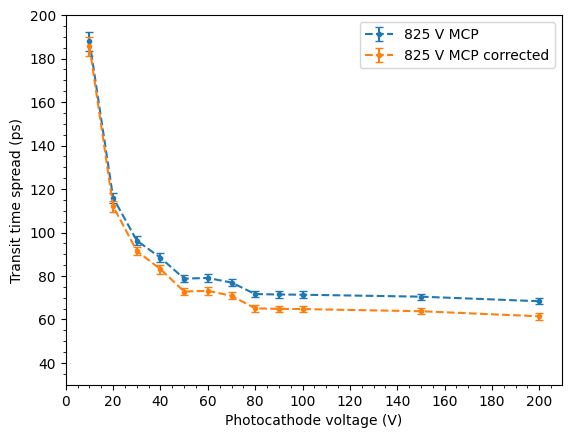

In [5]:
plt.errorbar(pc_voltages, tts_values, yerr=tts_errs, linestyle="--", marker="o", markersize=3, capsize=3, label="825 V MCP")
plt.errorbar(pc_voltages, tts_corr, yerr=tts_errs, linestyle="--", marker="o", markersize=3, capsize=3, label="825 V MCP corrected")
plt.xlabel("Photocathode voltage (V)")
plt.ylabel("Transit time spread (ps)")
plt.ylim(30, 200)
plt.minorticks_on()
plt.xticks(range(0, 201, 20))
plt.legend()
plt.show()

In [6]:
tts = {}

for mcp_voltage in mcp_voltages:
    tts[mcp_voltage] = {}
    for pc_voltage in pc_voltages:
        try:
            tts[mcp_voltage][pc_voltage] = np.load(f"{data_dir}/MCP{mcp_voltage}/PC{pc_voltage}_tts.npy")
        except FileNotFoundError:
            print(f"Could not find file for MCP voltage {mcp_voltage} and photocathode voltage {pc_voltage}")

Could not find file for MCP voltage 875 and photocathode voltage 150
Could not find file for MCP voltage 875 and photocathode voltage 200


In [7]:
def plot_hist(mcp, pc):
    print(f"Plotting {mcp} MCP and {pc} PC")
    try:
        plt.hist(tts[mcp][pc], tts_bins, histtype="step", label=f"{pc} V PC; {mcp} V MCP", alpha=0.8)
    except KeyError:
        pass

vec_plot_hist = np.vectorize(plot_hist, otypes=[None])

Plotting 825 MCP and 10 PC
Plotting 825 MCP and 20 PC
Plotting 825 MCP and 30 PC
Plotting 825 MCP and 50 PC
Plotting 825 MCP and 100 PC
Plotting 825 MCP and 200 PC


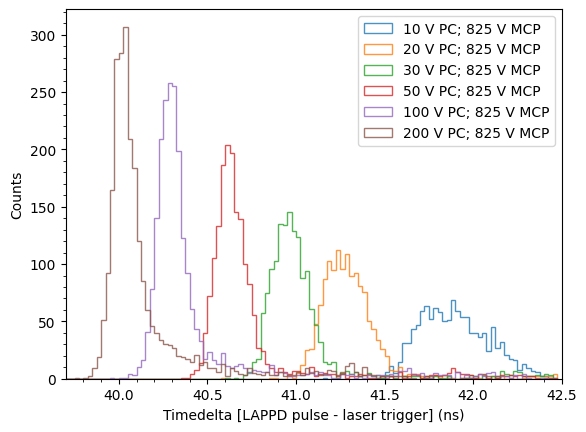

In [8]:
vec_plot_hist(825, [10, 20, 30, 50, 100, 200])
plt.xlabel("Timedelta [LAPPD pulse - laser trigger] (ns)")
plt.ylabel("Counts")
plt.xlim(39.7, 42.5)
plt.minorticks_on()
plt.legend()
plt.show()

In [9]:
tts_binmin = 39.2
tts_binmax = 42.2
tts_bin_width = 0.025
tts_bins = np.arange(tts_binmin, tts_binmax, tts_bin_width)

Plotting 850 MCP and 10 PC
Plotting 850 MCP and 20 PC
Plotting 850 MCP and 30 PC
Plotting 850 MCP and 50 PC
Plotting 850 MCP and 100 PC
Plotting 850 MCP and 200 PC


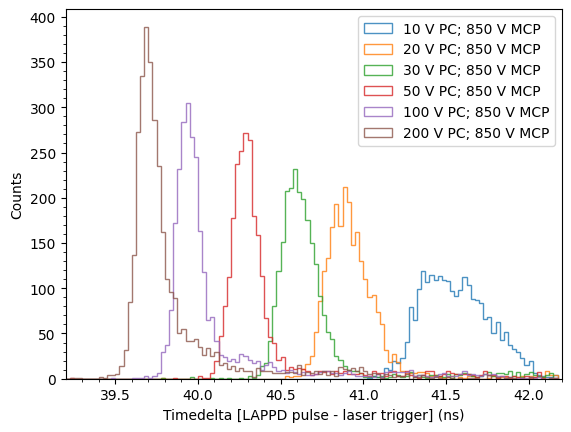

In [10]:
vec_plot_hist(850, [10, 20, 30, 50, 100, 200])
plt.xlabel("Timedelta [LAPPD pulse - laser trigger] (ns)")
plt.ylabel("Counts")
plt.xlim(39.2, 42.2)
plt.minorticks_on()
plt.legend()
plt.show()

In [20]:
import ROOT as root
th1 = root.TH1F("hist", "hist", 300, tts_binmin, tts_binmax)
for value in tts[825][100]:
    th1.Fill(value)
th1.Fit("gaus")
del th1

 FCN=397.818 FROM MIGRAD    STATUS=CONVERGED     108 CALLS         109 TOTAL
                     EDM=6.8803e-11    STRATEGY= 1  ERROR MATRIX UNCERTAINTY   1.5 per cent
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     1.00606e+02   3.23621e+00   1.99370e-03   2.68674e-06
   2  Mean         4.02937e+01   1.81215e-03  -5.84809e-08   7.69040e-03
   3  Sigma        7.03541e-02   1.54342e-03   5.09135e-06  -1.92976e-03


Plotting 800 MCP and 60 PC
Plotting 825 MCP and 60 PC
Plotting 850 MCP and 60 PC
Plotting 875 MCP and 60 PC


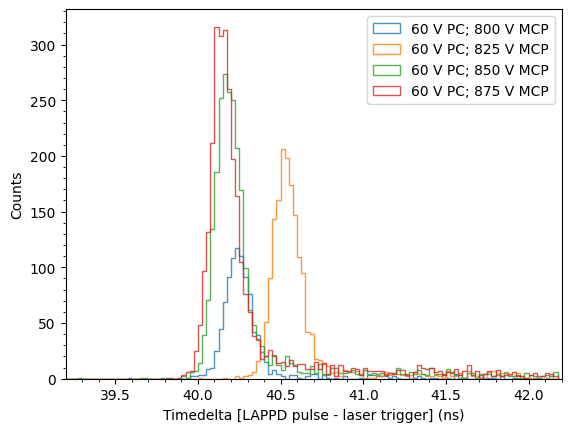

In [11]:
vec_plot_hist([800, 825, 850, 875], 60)
plt.xlabel("Timedelta [LAPPD pulse - laser trigger] (ns)")
plt.ylabel("Counts")
plt.xlim(39.2, 42.2)
plt.minorticks_on()
plt.legend()
plt.show()